# The Transformation and Accept/Reject (aka. Von Neumann) methods 
Python notebook with exercise on how to generate random numbers following a specific PDF using uniformly distributed random numbers, in this case three different functions, each with their own challenge.

Both the Accept-Reject (Von Neumann) and transformation method should be considered for the problem (or a combination of both!):
- Transformation method (if function can be integrated and then inverted).
- Accept-Reject (or Hit & Miss) method (by Ulam Stanislav and John Von Neumann).

### References:
- G. Cowan: Chapter 3
- P. R. Bevington: page 81-84
- __[40. Monte Carlo Techniques PDG](http://pdg.lbl.gov/2020/reviews/rpp2020-rev-monte-carlo-techniques.pdf)__

### Authors: 
- Troels C. Petersen (Niels Bohr Institute)

### Date:    
- 29-11-2022 (latest update)

***

In [9]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Modules to see files and folders in directories
from scipy import stats
import sympy as sy

Load external functions:

In [10]:
sys.path.append('../../External_Functions')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax    # Useful functions to print fit results on figure

plt.rcParams['font.size'] = 18     # Set some basic plotting parameters

Set the parameters of the program:

In [11]:
r = np.random
r.seed(42)

save_plots = False  
N_points = 10000    # Number of random points to be generated

## Problem 1: 

#### Produce random points following $f(x) \sim \exp(-x/3), x \in [0, \infty]$.

In [14]:
x, F = sy.symbols(['x','C'])
i_analytic = sy.integrate(sy.exp(-x/3), (x, 0, x))
print("Analytic integral: ", i_analytic)

Analytic integral:  3 - 3*exp(-x/3)


In [4]:
# Define a reasonable range to plot in:
xmin = 0
xmax = 20
N_bins = 100

x_exp = 20.0*r.uniform(size=N_points)     # This is NOT the solution - just something to plot!

And to make sure that we have computed the points correctly, we plot a histogram of the data:

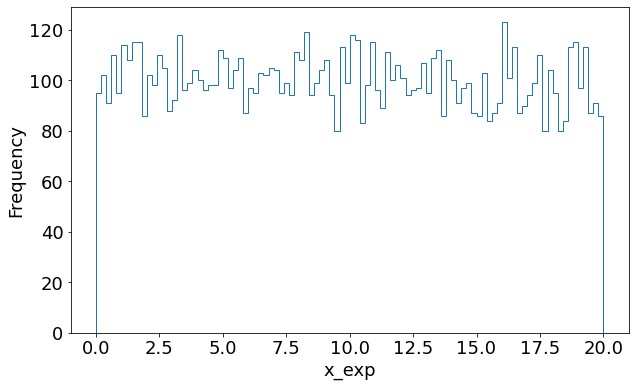

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(x_exp, bins=100, range=(xmin, xmax), histtype='step', label='histogram' )
ax.set(xlabel="x_exp", ylabel="Frequency", xlim=(xmin-1.0, xmax+1.0));

## Problem 2: 

#### Produce random points following $g(x) \sim x \cos(x), x \in [0, \frac{\pi}{2}]$.

In [6]:
xmin2, xmax2 = 0, np.pi/2         # Note the simple/short notation.

## Problem 3: 

#### Produce random points following $h(x) \sim \exp(-x/3)\cos(x)^2$ in the interval $[0, \infty]$ and estimate the integral of $h(x)$ in the defined range.

# Learning points:

While you should by now be able to solve problem 1+2 with at least one of the methods, problem 3 is harder, and requires the combination of the two. Solving this exercise should make you:
1. "proficient" in using the two standard methods.
2. capable of getting random numbers according to ALL 1D PDFs, bounded/integrable/invertible or not.

The last point of problem 3 should also illustrate, how you can estimate integrals using this method.